In [2]:
from matplotlib import pyplot
import numpy
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from numpy import set_printoptions 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer


In [3]:
filename = 'C:\\Users\\fabio\\Desktop\\glass+identification\\glass.data'
columns = ['Id', 'Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
columns_after_drop = ['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
dataset_before_drop = read_csv(filename, names=columns, sep=',')
dataset = dataset_before_drop.drop(['Id', 'Type'], axis=1)
print("haad:" , dataset.head())
print("Shape of dataset:", dataset.shape)

haad:         Ri     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
Shape of dataset: (214, 9)


In [4]:
set_option('display.max_rows', 500)
set_option('display.width', 100)
set_option('display.precision', 3) 


In [5]:
print("Data types of each column:\n", dataset.dtypes)


Data types of each column:
 Ri    float64
Na    float64
Mg    float64
Al    float64
Si    float64
K     float64
Ca    float64
Ba    float64
Fe    float64
dtype: object


In [6]:
print("First 20 rows of the dataset:\n", dataset.head(20))


First 20 rows of the dataset:
        Ri     Na    Mg    Al     Si     K    Ca   Ba    Fe
0   1.521  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00
1   1.518  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00
2   1.516  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00
3   1.518  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00
4   1.517  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00
5   1.516  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26
6   1.517  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00
7   1.518  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00
8   1.519  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00
9   1.518  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11
10  1.516  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24
11  1.518  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00
12  1.516  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24
13  1.517  12.86  3.56  1.27  73.21  0.54  8.38  0.0  0.17
14  1.518  12.61  3.59  1.31  73.29  0.58  8.50  0.0  0.00
15  1.518  12.81  3.54  1

In [7]:
print(dataset.describe())

            Ri       Na       Mg       Al       Si        K       Ca       Ba       Fe
count  214.000  214.000  214.000  214.000  214.000  214.000  214.000  214.000  214.000
mean     1.518   13.408    2.685    1.445   72.651    0.497    8.957    0.175    0.057
std      0.003    0.817    1.442    0.499    0.775    0.652    1.423    0.497    0.097
min      1.511   10.730    0.000    0.290   69.810    0.000    5.430    0.000    0.000
25%      1.517   12.908    2.115    1.190   72.280    0.122    8.240    0.000    0.000
50%      1.518   13.300    3.480    1.360   72.790    0.555    8.600    0.000    0.000
75%      1.519   13.825    3.600    1.630   73.088    0.610    9.172    0.000    0.100
max      1.534   17.380    4.490    3.500   75.410    6.210   16.190    3.150    0.510


In [8]:
print(dataset_before_drop.groupby('Type').size())

Type
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64


In [9]:
print(dataset.corr(method = 'pearson'))

           Ri     Na     Mg     Al     Si      K     Ca         Ba     Fe
Ri  1.000e+00 -0.192 -0.122 -0.407 -0.542 -0.290  0.810 -3.860e-04  0.143
Na -1.919e-01  1.000 -0.274  0.157 -0.070 -0.266 -0.275  3.266e-01 -0.241
Mg -1.223e-01 -0.274  1.000 -0.482 -0.166  0.005 -0.444 -4.923e-01  0.083
Al -4.073e-01  0.157 -0.482  1.000 -0.006  0.326 -0.260  4.794e-01 -0.074
Si -5.421e-01 -0.070 -0.166 -0.006  1.000 -0.193 -0.209 -1.022e-01 -0.094
K  -2.898e-01 -0.266  0.005  0.326 -0.193  1.000 -0.318 -4.262e-02 -0.008
Ca  8.104e-01 -0.275 -0.444 -0.260 -0.209 -0.318  1.000 -1.128e-01  0.125
Ba -3.860e-04  0.327 -0.492  0.479 -0.102 -0.043 -0.113  1.000e+00 -0.059
Fe  1.430e-01 -0.241  0.083 -0.074 -0.094 -0.008  0.125 -5.869e-02  1.000


In [10]:
print(dataset.skew())

Ri    1.625
Na    0.454
Mg   -1.153
Al    0.907
Si   -0.730
K     6.552
Ca    2.047
Ba    3.416
Fe    1.754
dtype: float64


[[<Axes: title={'center': 'Ri'}> <Axes: title={'center': 'Na'}>
  <Axes: title={'center': 'Mg'}>]
 [<Axes: title={'center': 'Al'}> <Axes: title={'center': 'Si'}>
  <Axes: title={'center': 'K'}>]
 [<Axes: title={'center': 'Ca'}> <Axes: title={'center': 'Ba'}>
  <Axes: title={'center': 'Fe'}>]]


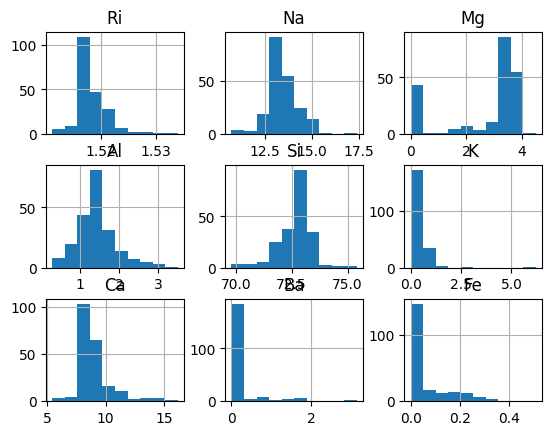

In [12]:
print(dataset.hist())
pyplot.figsize = (8,8)
pyplot.savefig('histograms.png', dpi=300)
pyplot.show()

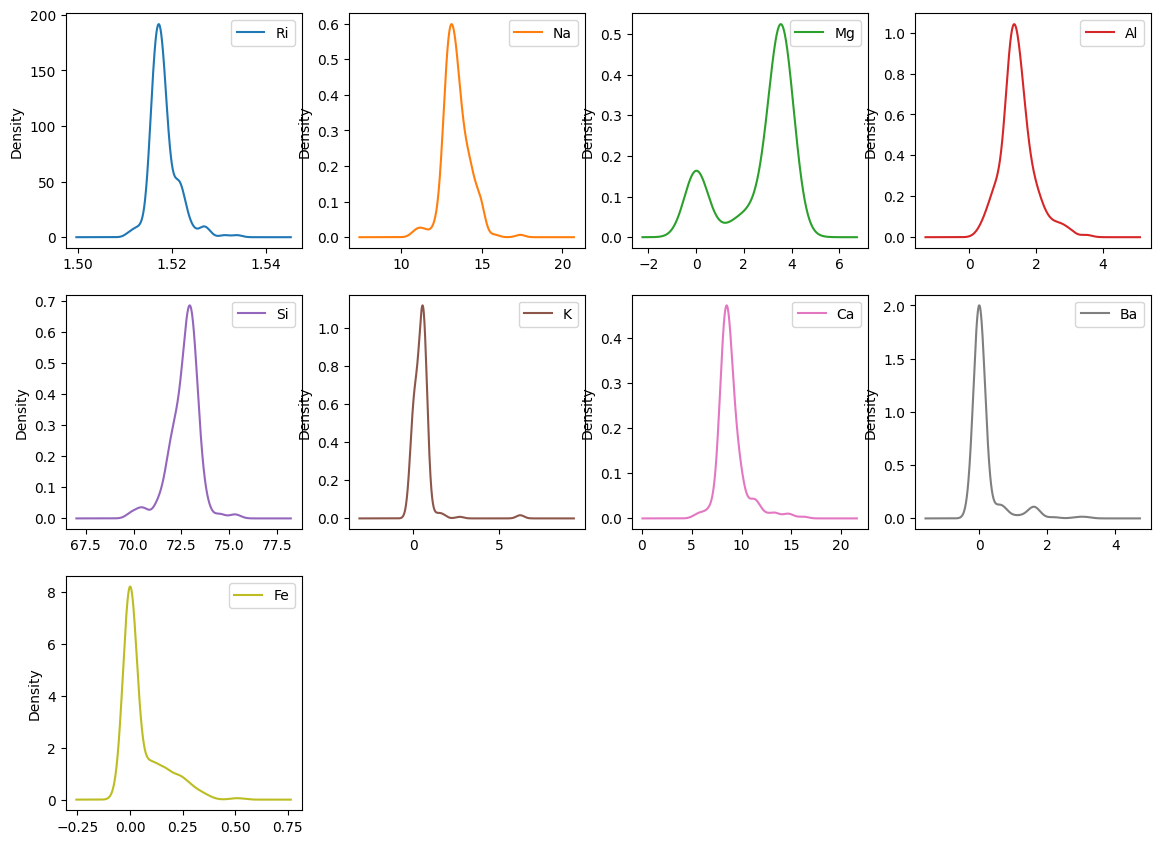

In [13]:
dataset.plot(kind='density' , subplots=True, layout=(4,4), sharex=False, figsize=(14,14))
pyplot.show()


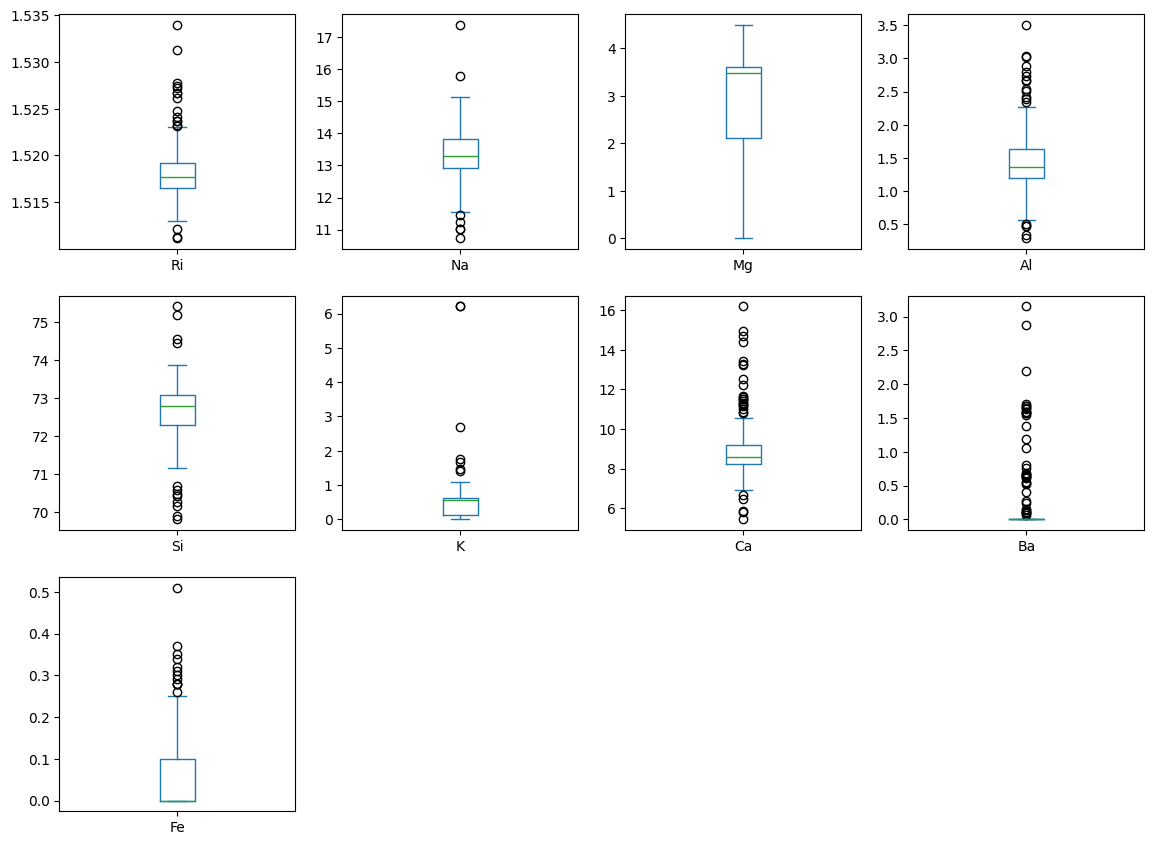

In [14]:
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, figsize=(14,14))
pyplot.show()


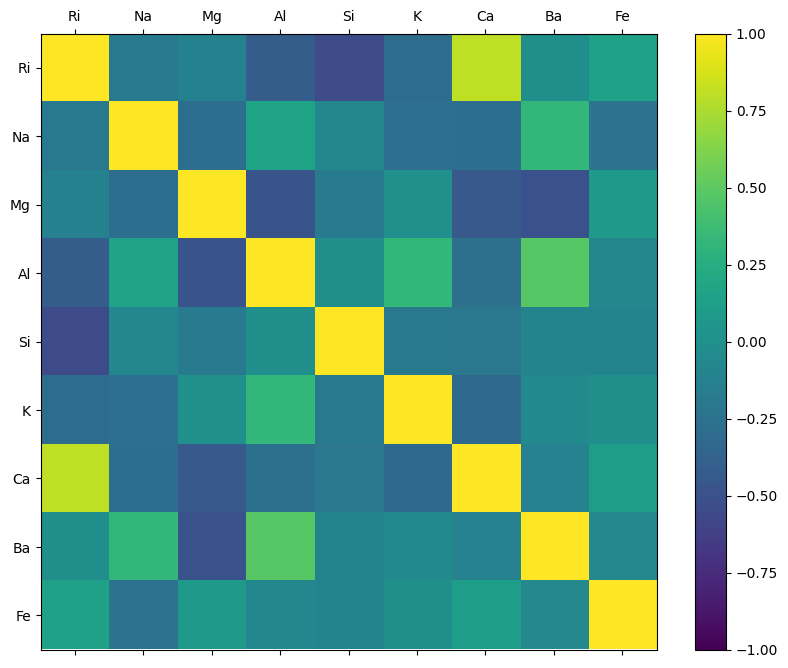

In [15]:
fig = pyplot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns_after_drop)
ax.set_yticklabels(columns_after_drop)
pyplot.show()


In [ ]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

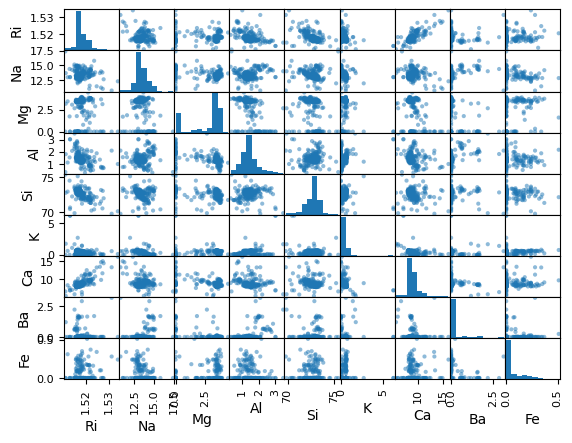

<Figure size 2000x1800 with 0 Axes>

In [19]:
scatter_matrix(dataset)
pyplot.figure(figsize=(20,18))
pyplot.show()

In [18]:
array = dataset.values
X = array[:, 0:9] 
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(X)  
set_printoptions(precision=3)  
print(rescaledX[0:5, :]) 

[[0.433 0.438 1.    0.252 0.352 0.01  0.309 0.    0.   ]
 [0.284 0.475 0.802 0.333 0.521 0.077 0.223 0.    0.   ]
 [0.221 0.421 0.791 0.389 0.568 0.063 0.218 0.    0.   ]
 [0.286 0.373 0.822 0.312 0.5   0.092 0.259 0.    0.   ]
 [0.275 0.382 0.806 0.296 0.584 0.089 0.245 0.    0.   ]]


In [20]:
X = array[:, 0:9]  
scaler_standard = StandardScaler().fit(X)
rescaled_standardX = scaler_standard.transform(X) 
set_printoptions(precision=3)  
print(rescaled_standardX[0:5, :])  

[[ 0.873  0.285  1.255 -0.692 -1.127 -0.672 -0.146 -0.353 -0.586]
 [-0.249  0.592  0.636 -0.17   0.102 -0.026 -0.794 -0.353 -0.586]
 [-0.721  0.15   0.601  0.191  0.439 -0.165 -0.829 -0.353 -0.586]
 [-0.233 -0.243  0.699 -0.311 -0.053  0.112 -0.519 -0.353 -0.586]
 [-0.312 -0.169  0.65  -0.411  0.555  0.081 -0.625 -0.353 -0.586]]


In [21]:
X = array[:, 0:9]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
set_printoptions(precision=3)
print(normalizedX[0:5, :])

[[2.062e-02 1.850e-01 6.088e-02 1.492e-02 9.733e-01 8.136e-04 1.186e-01
  0.000e+00 0.000e+00]
 [2.035e-02 1.863e-01 4.827e-02 1.824e-02 9.753e-01 6.437e-03 1.050e-01
  0.000e+00 0.000e+00]
 [2.028e-02 1.810e-01 4.749e-02 2.060e-02 9.764e-01 5.217e-03 1.041e-01
  0.000e+00 0.000e+00]
 [2.040e-02 1.776e-01 4.961e-02 1.734e-02 9.762e-01 7.663e-03 1.105e-01
  0.000e+00 0.000e+00]
 [2.028e-02 1.773e-01 4.838e-02 1.657e-02 9.766e-01 7.350e-03 1.078e-01
  0.000e+00 0.000e+00]]


In [22]:
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
set_printoptions(precision=3)
print(binaryX[0:5, :])

[[1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0.]]
